In [72]:
#Project Motivation
#1.	Top  Zipcodes with most number of listing?
#2.	What kind of property is mostly available?
#3.	What are 10 most popular amenities ?
#4.	Which review score is most important that impacts rating?

# Load important libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

# Load Dataset

In [3]:
df_l=pd.read_csv(r"C:\Users\seela\Udacity\listings.csv")

# Access data

In [4]:
df_l.shape # the listing dataset has 3818 rows and 92 columns

(3818, 92)

In [5]:
df_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   float64
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [6]:
#The above info tells us that no columns have all  Null values. But in many column complete 3818 data not present, hence we have 
#to find what is % of data missing and if the % of missing data is more than 50% we will delete those columns.

# Data Preparation

In [7]:
# Drop columns with more than 50% values missing 

In [8]:
df_l.columns[df_l.isnull().sum()/df_l.shape[0]*100>50]

Index(['square_feet', 'monthly_price', 'security_deposit', 'license'], dtype='object')

In [9]:
#square_feet', 'monthly_price', 'security_deposit', 'license' these are the columns that has 50% null values

In [10]:
df_l1=df_l.drop(['square_feet', 'monthly_price', 'security_deposit', 'license'],axis=1)

In [11]:
df_l1.shape

(3818, 88)

<AxesSubplot:>

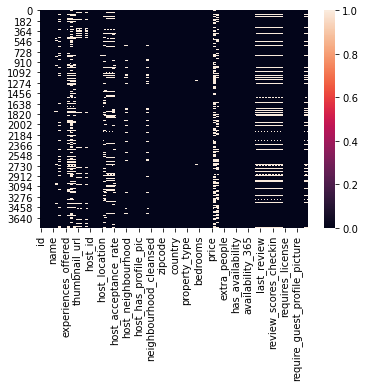

In [12]:
sns.heatmap(df_l1.isnull())

In [13]:
# The above heat maps shows that there are still may columns with the null values (white color indicates null). Lets see 
#columns with more than 25% values missing, if those columns are not required for our analysis we may drop them.

In [14]:
df_l1.columns[df_l1.isnull().sum()/df_l1.shape[0]*100>25]

Index(['neighborhood_overview', 'notes', 'weekly_price', 'cleaning_fee'], dtype='object')

In [15]:
df_l2=df_l1.drop(['neighborhood_overview', 'notes', 'weekly_price', 'cleaning_fee'],axis=1)
df_l2.shape

(3818, 84)

<AxesSubplot:>

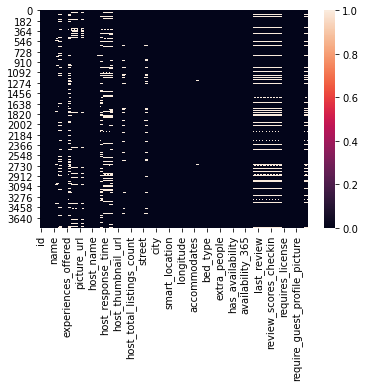

In [16]:
sns.heatmap(df_l2.isnull())

In [17]:
#there is little bit of reduction in white space, but still a lot left. Before we further clean the data we may need to
#check our dataset and make an anecdotal judgment of dropping some columns 

In [18]:
#based on anecdotal analysis of the data we found that the data set has several URL columns which are not required for 
#our analysis so it is better we drop them.

In [19]:
df_l2=df_l1.drop(['neighborhood_overview', 'notes', 'weekly_price', 'cleaning_fee','listing_url','thumbnail_url','medium_url','picture_url','xl_picture_url','host_url','host_thumbnail_url',
                 'host_picture_url'],axis=1)
df_l2.shape

(3818, 76)

<AxesSubplot:>

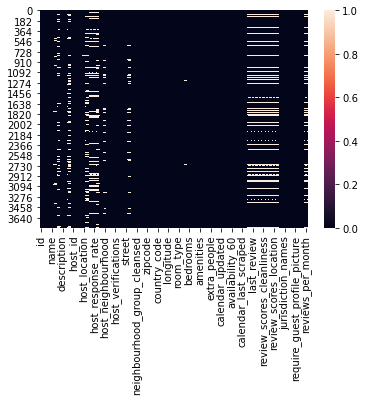

In [66]:
sns.heatmap(df_l2.isnull())

In [ ]:
#Lets check further and see the columns we may need to clean.

In [21]:
df_l2.select_dtypes(include=['object']).columns

Index(['last_scraped', 'name', 'summary', 'space', 'description',
       'experiences_offered', 'transit', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'state', 'zipcode', 'market', 'smart_location', 'country_code',
       'country', 'is_location_exact', 'property_type', 'room_type',
       'bed_type', 'amenities', 'price', 'extra_people', 'calendar_updated',
       'has_availability', 'calendar_last_scraped', 'first_review',
       'last_review', 'requires_license', 'jurisdiction_names',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification'],
      dtype='object')

In [22]:
#last scrap:- This column has just one value, therefore its just a burden & adding no value
#summary:- Not required for our analysis
#space :- Not needed for our analysis
#description:- Not needed for our analysis
#experience offered:- It has just one value that is "None" for all hence its of no use.
#transit:- Text field Not needed for our analysis
#State:WA, is the only value present hence not needed
#Market:Seattle, is the only data present, hence not needed for our analysis
#County:-USA, redundant data 
#Country Code:-US,redundant data
#Jurisdiction Name:- Only one value for all fields 
#host about:- text field Not required for our analysis

 # The above are the columns I am absolutely sure about dropping, there are still more columns that we can drop, but I am 
#not dropping it as this is my first Datascience Project and I may use it for future analysis and update github accordingly.

In [23]:
df_l3=df_l2.drop(['last_scraped','summary','space','description','experiences_offered','transit','state','market','country_code',
           'country','host_about'],axis=1)

In [24]:
df_l3.shape

(3818, 65)

<AxesSubplot:>

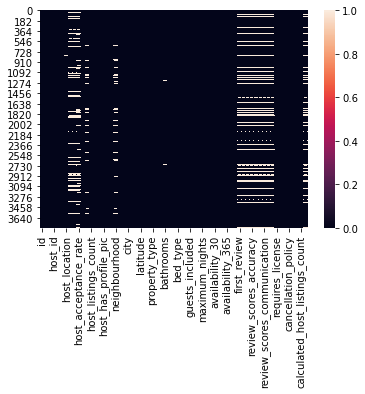

In [25]:
sns.heatmap(df_l3.isnull())

In [26]:
df_l3.isnull().sum().sum()

9047

In [27]:
#Before cleaning the dataset further, we definitly know that "Zipcode" & "Property_Type" are the columns we need for our
#analysis. Although zipcode take numerical values, but are not quantitative They are qualitative or categorical variables. 
#The avergae of two zip codes doesnt make sense. Hence we will impute Zipcode with mode. We will also impute property_type
#with mode.

In [28]:
df_l3['zipcode'] = df_l3['zipcode'].fillna(df_l3['zipcode'].mode()[0])

In [29]:
df_l3['zipcode'].isnull().sum()

0

In [30]:
df_l3['property_type'] = df_l3['property_type'].fillna(df_l3['property_type'].mode()[0])

In [31]:
df_l3['property_type'].isnull().sum()

0

<AxesSubplot:>

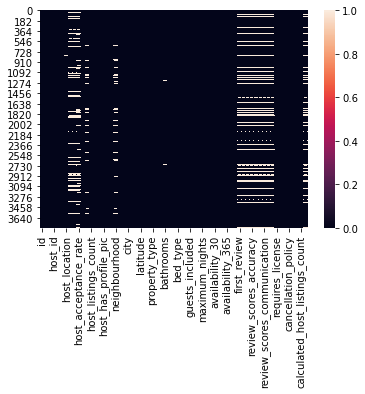

In [32]:
sns.heatmap(df_l3.isnull())

In [33]:
#we also aim to analyse the correlation of factors on review scores, hence we will impute those with the mean as its a float.

In [34]:
df_l3['review_scores_rating'].fillna(df_l3['review_scores_rating'].mean(), inplace=True)
df_l3['review_scores_accuracy'].fillna(df_l3['review_scores_accuracy'].mean(),inplace=True)
df_l3['review_scores_cleanliness'].fillna(df_l3['review_scores_cleanliness'].mean(),inplace=True)
df_l3['review_scores_checkin'].fillna(df_l3['review_scores_checkin'].mean(),inplace=True)
df_l3['review_scores_communication'].fillna(df_l3['review_scores_communication'].mean(),inplace=True)
df_l3['review_scores_location'].fillna(df_l3['review_scores_location'].mean(),inplace=True)
df_l3['review_scores_value'].fillna(df_l3['review_scores_value'].mean(),inplace=True)

<AxesSubplot:>

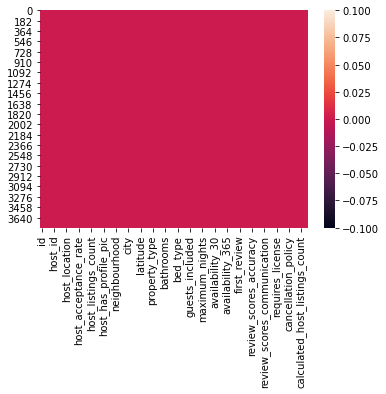

In [67]:
sns.heatmap(df_l3.isnull())

In [ ]:
#Find the fields that still has null values.

In [36]:
df_l3.columns[df_l3.isnull().sum()/df_l3.shape[0]*100>0]

Index(['host_name', 'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'bathrooms', 'bedrooms',
       'beds', 'first_review', 'last_review', 'reviews_per_month'],
      dtype='object')

In [37]:
#we still have the above columns with null values, although we may not need these columns for our analysis, however for the 
#sake of practice and learining I would impute it and may use it in future analysis if required. I will impute the numeric values with
#mean , non numeric with mode and few columns I will just impute with 0 so that the data set is without any null values.

In [68]:
df_l3[['host_name', 'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'bathrooms', 'bedrooms',
       'beds', 'first_review', 'last_review', 'reviews_per_month']]

,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,bathrooms,bedrooms,beds,first_review,last_review,reviews_per_month
0,Maija,8/11/2011,"Seattle, Washington, United States",within a few hours,96%,100%,f,Queen Anne,3.0,3.0,t,t,Queen Anne,1.0,1.0,1.0,11/1/2011,1/2/2016,4.070000
1,Andrea,2/21/2013,"Seattle, Washington, United States",within an hour,98%,100%,t,Queen Anne,6.0,6.0,t,t,Queen Anne,1.0,1.0,1.0,8/19/2013,12/29/2015,1.480000
2,Jill,6/12/2014,"Seattle, Washington, United States",within a few hours,67%,100%,f,Queen Anne,2.0,2.0,t,t,Queen Anne,4.5,5.0,7.0,7/30/2014,9/3/2015,1.150000
3,Emily,11/6/2013,"Seattle, Washington, United States",within an hour,0,0,f,Queen Anne,1.0,1.0,t,t,Queen Anne,1.0,0.0,2.0,0,0,2.078919
4,Emily,11/29/2011,"Seattle, Washington, United States",within an hour,100%,0,f,Queen Anne,2.0,2.0,t,t,Queen Anne,2.0,3.0,3.0,7/10/2012,10/24/2015,0.890000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,Bo,4/13/2015,US,within a few hours,99%,100%,f,Holly,354.0,354.0,t,t,Fremont,2.0,3.0,3.0,9/27/2015,9/27/2015,0.300000
3814,Glen,10/14/2015,"Seattle, Washington, United States",within an hour,100%,100%,f,Portage Bay,1.0,1.0,t,t,Portage Bay,1.0,1.0,2.0,12/18/2015,12/24/2015,2.000000
3815,Virginia,12/30/2015,US,within an hour,0,0,f,0,1.0,1.0,t,f,0,1.0,1.0,1.0,0,0,2.078919
3816,Karen,1/3/2015,"Tacoma, Washington, United States",within an hour,100%,0,f,0,1.0,1.0,t,t,0,1.0,0.0,1.0,0,0,2.078919


In [71]:
df_l3[['host_name', 'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'bathrooms', 'bedrooms',
       'beds', 'first_review', 'last_review', 'reviews_per_month']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_name                  3818 non-null   object 
 1   host_since                 3818 non-null   object 
 2   host_location              3818 non-null   object 
 3   host_response_time         3818 non-null   object 
 4   host_response_rate         3818 non-null   object 
 5   host_acceptance_rate       3818 non-null   object 
 6   host_is_superhost          3818 non-null   object 
 7   host_neighbourhood         3818 non-null   object 
 8   host_listings_count        3818 non-null   float64
 9   host_total_listings_count  3818 non-null   float64
 10  host_has_profile_pic       3818 non-null   object 
 11  host_identity_verified     3818 non-null   object 
 12  neighbourhood              3818 non-null   object 
 13  bathrooms                  3818 non-null   float

In [39]:
df_l3['bathrooms'].fillna(df_l3['bathrooms'].mean(), inplace=True)
df_l3['bedrooms'].fillna(df_l3['bedrooms'].mean(),inplace=True)
df_l3['host_listings_count'].fillna(df_l3['host_listings_count'].mean(),inplace=True)
df_l3['host_total_listings_count'].fillna(df_l3['host_total_listings_count'].mean(),inplace=True)
df_l3['beds'].fillna(df_l3['beds'].mean(),inplace=True)


<AxesSubplot:>

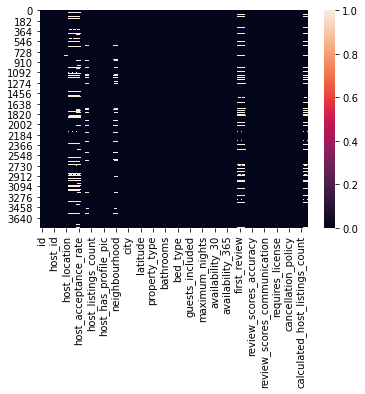

In [40]:
sns.heatmap(df_l3.isnull())

In [41]:
df_l3.columns[df_l3.isnull().sum()/df_l3.shape[0]*100>0]

Index(['host_name', 'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'first_review', 'last_review', 'reviews_per_month'],
      dtype='object')

In [42]:
df_l3.isnull().sum().sum()

4434

In [43]:
df_l3['host_is_superhost'] = df_l3['host_is_superhost'].fillna(df_l3['host_is_superhost'].mode()[0])
df_l3['host_has_profile_pic'] = df_l3['host_has_profile_pic'].fillna(df_l3['host_has_profile_pic'].mode()[0])
df_l3['host_identity_verified'] = df_l3['host_identity_verified'].fillna(df_l3['host_identity_verified'].mode()[0])
df_l3['host_response_time'] = df_l3['host_response_time'].fillna(df_l3['host_response_time'].mode()[0])

<AxesSubplot:>

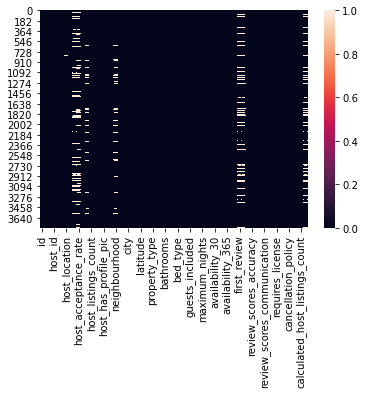

In [44]:
sns.heatmap(df_l3.isnull())

In [45]:
df_l3.isnull().sum().sum()

3905

sns.heatmap(df_l3.isnull())

In [46]:
df_l3.columns[df_l3.isnull().sum()/df_l3.shape[0]*100>0]

Index(['host_name', 'host_since', 'host_location', 'host_response_rate',
       'host_acceptance_rate', 'host_neighbourhood', 'neighbourhood',
       'first_review', 'last_review', 'reviews_per_month'],
      dtype='object')

In [47]:
df_l3['host_name'].fillna(0,inplace=True)
df_l3['host_since'].fillna(0,inplace=True)
df_l3['host_location'].fillna(0,inplace=True)
df_l3['host_response_rate'].fillna(0,inplace=True)
df_l3['host_acceptance_rate'].fillna(0,inplace=True)
df_l3['host_neighbourhood'].fillna(0,inplace=True)
df_l3['neighbourhood'].fillna(0,inplace=True)
df_l3['first_review'].fillna(0,inplace=True)
df_l3['last_review'].fillna(0,inplace=True)
df_l3['reviews_per_month'].fillna(df_l3['reviews_per_month'].mean(),inplace=True)

In [48]:
df_l3.isnull().sum().sum()

0

<AxesSubplot:>

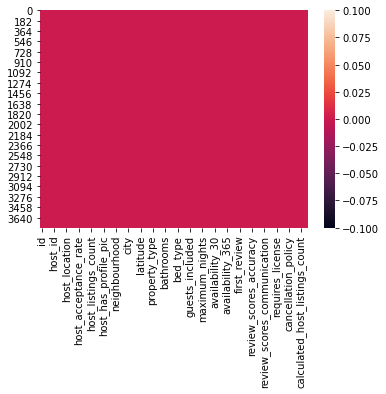

In [49]:
sns.heatmap(df_l3.isnull())

In [50]:
# Now we can see there is no missing data in our dataset. Please note, I may not need the entire data set for my analysis
#however for learning purpose I tried to follow the process of imputing all null values and  avoid dropping columns as much 
#as possible

In [51]:
df_l3.shape

(3818, 65)

# Data Analysis

# Zipcode that has most listing 

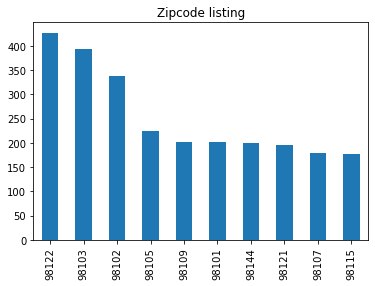

In [54]:
zip_status=df_l3['zipcode'].value_counts()
(zip_status[:10]).plot(kind="bar")
plt.title("Zipcode listing");

In [53]:
#From the barchart we can see that Zipcode 98122 has most number of listing, followed closely by 98103

# Most available property types

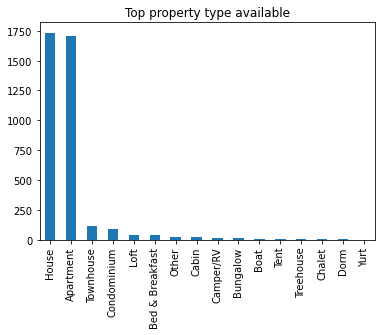

In [55]:
Property_type=df_l3['property_type'].value_counts()
(Property_type).plot(kind="bar")
plt.title("Top property type available");

In [ ]:
#Property type is dominated by houses and apartments. 

# Top 10 Amenities 

In [59]:
amenities_demand=df_l3['amenities'].value_counts().reset_index()
amenities_demand.head

<bound method NDFrame.head of                                                   index  amenities
0                                                    {}         45
1     {Internet,"Wireless Internet",Kitchen,"Free Pa...         11
2     {TV,"Cable TV",Internet,"Wireless Internet",Po...         10
3     {TV,"Cable TV",Internet,"Wireless Internet",Ki...          8
4     {TV,Internet,"Wireless Internet","Air Conditio...          7
...                                                 ...        ...
3279  {TV,"Cable TV",Internet,"Wireless Internet","W...          1
3280  {TV,Internet,"Wireless Internet","Air Conditio...          1
3281  {TV,"Cable TV",Internet,"Wireless Internet",Ki...          1
3282  {TV,Internet,"Wireless Internet",Kitchen,"Pets...          1
3283  {TV,Internet,"Wireless Internet","Air Conditio...          1

[3284 rows x 2 columns]>

In [73]:
amenities_demand.rename(columns={'index':'method','amenities':'count'},inplace=True)
amenities_demand.head(5)

,method,count
0,{},45
1,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",11
2,"{TV,""Cable TV"",Internet,""Wireless Internet"",Po...",10
3,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",8
4,"{TV,Internet,""Wireless Internet"",""Air Conditio...",7


In [ ]:
#To derive the below given unique list of all amenities, I used excel text to column feature and 
#then removed the duplicates. This way I got all unique amenities

In [61]:
Possible_amenities=['TV','Air Conditioning','Cable TV','Elevator in Building','Free Parking on Premises','Smoke Detector',
                    'Wheelchair Accessible','Wireless Internet','24-Hour Check-in','Air Conditioning','Breakfast','Buzzer/Wireless',
                    'IntercomCable TV','Carbon Monoxide Detector','Cat(s)','Dog(s)','Doorman','Dryer','Elevator in Building'
                    'Essentials','Family/Kid Friendly','Fire Extinguisher','First Aid Kit','Free Parking on Premises','Gym',
                    'Hair Dryer','Hangers','Heating','Hot Tub','Indoor Fireplace','Internet','Iron','Kitchen',
                    'Laptop Friendly Workspace','Lock on Bedroom Door','Other pet(s)','Pets Allowed',
                    'Pets live on this property','Pool','Safety Card','Shampoo','Smoke Detector','Smoking Allowed',
                    'Suitable for Events','Washer','Washer / Dryer','Wheelchair Accessible','Wireless Internet']

In [62]:
def total_count(amenities_demand,method,count,Possible_amenities):
    from collections import defaultdict
    new_df=defaultdict(int)
    for val in Possible_amenities:
        for idx in range(amenities_demand.shape[0]):
            if val in amenities_demand['method'][idx]:
                new_df[val]+= int(amenities_demand['count'][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns=['method','count']
    new_df.sort_values('count',ascending=False,inplace=True)
    return new_df

In [63]:
#Note the above code is used as is from Udacity material

In [64]:
amenities_demand1=total_count(amenities_demand,'method','count',Possible_amenities)
amenities_demand1

,method,count
7,Wireless Internet,7334
5,Smoke Detector,6562
4,Free Parking on Premises,4334
25,Internet,3692
22,Heating,3627
27,Kitchen,3423
15,Dryer,3114
38,Washer,2992
0,TV,2741
35,Shampoo,2670


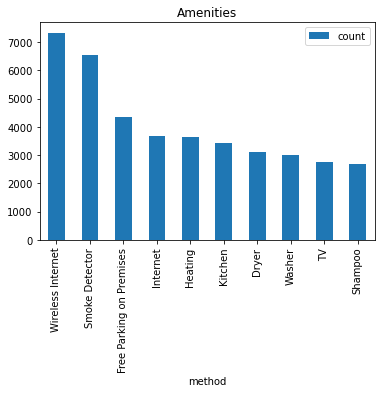

In [65]:
(amenities_demand1[:10]).plot.bar(x='method',y='count')
plt.title("Amenities");

In [ ]:
#Wireless Internet and Smoke Detector is something that most hosts are providing

In [133]:
df_l3.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,...,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.620648,28.620648,0.043052,0.031745,1.977599,0.589130,0.882700,...,37.730892,6.020223,0.635022,0.725880,0.541745,0.517493,0.572542,0.682751,5.893029,1.665964
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354321,2.000000,1.000000,1.000000,...,2.000000,94.000000,9.636392,9.000000,9.786709,9.809599,9.000000,9.000000,1.000000,0.830000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,9.000000,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.452245,1.000000,2.000000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,26.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,2.660000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,37.000000,12.150000


# Review that influence Rating

In [135]:
df_l4=df_l3[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
             'review_scores_communication','review_scores_location','review_scores_value']]
df_l4

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000
1,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
2,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
3,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245
4,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
...,...,...,...,...,...,...,...
3813,80.000000,8.000000,10.000000,4.000000,8.000000,10.000000,8.000000
3814,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
3815,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245
3816,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245


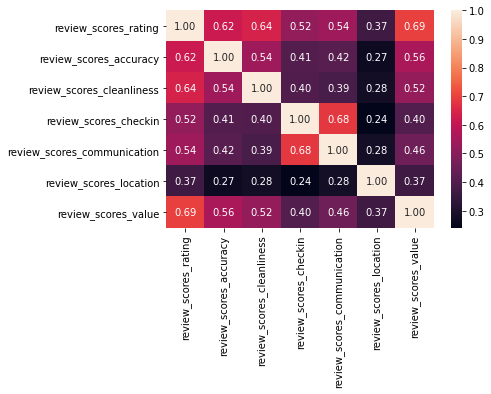

In [137]:
sns.heatmap(df_l4.corr(),annot=True,fmt='.2f');

In [ ]:
#As per the heatmap plotted , it seems that the review score value has most impact on rating

# Accuracy of the Model

In [60]:
X=df_l3[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
             'review_scores_communication','review_scores_location','review_scores_value']]
y=df_l3['price']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30, random_state=42)
lm_model=LinearRegression(normalize=True)
lm_model.fit(X_train,y_train)

LinearRegression(normalize=True)

In [66]:
df_l3['price']=df_l3['price'].replace(['$'],'')
df_l3['price']=df_l3['price'].astype

In [67]:
y_test_preds=lm_model.predict(X_test)
r2_test=r2_score(y_test,y_test_preds)
r2_test

0.01512929034577759

In [ ]:
#Almost 2% of the variablity can be explained by our model